# SINDy example code

In [ ]:
import numpy as np
from scipy.integrate import odeint
from sklearn.model_selection import KFold, GridSearchCV

from context import sindy
from sindy import SINDy
from sindy.differentiation import differentiation_methods

import matplotlib.pyplot as plt
%matplotlib inline

## Generate training data

### harmonic oscillator

In [2]:
def rhs_harmonic_oscillator(y, t):
    dy0 = y[1]
    dy1 = -0.3 * y[0]
    return [dy0, dy1]

In [3]:
n_points = 1000

x0 = [0, 1]
t = np.linspace(0, 10, n_points)
x = odeint(rhs_harmonic_oscillator, x0, t)

train_idx = int(n_points * 0.75)
x_train, x_test = x[:train_idx], x[train_idx:]
t_train, t_test = t[:train_idx], t[train_idx:]

### lorenz

In [4]:
lorenz = lambda z,t : [10*(z[1] - z[0]), z[0]*(28 - z[2]) - z[1], z[0]*z[1] - 8/3*z[2]]

In [5]:
n_points = 1000

x0 = [8,27,-7]
t = np.linspace(0, 10, n_points)
x = odeint(lorenz, x0, t)

train_idx = int(n_points * 0.75)
x_train, x_test = x[:train_idx], x[train_idx:]
t_train, t_test = t[:train_idx], t[train_idx:]

## Basic examples

### Simplest version

In [6]:
model = SINDy()
model.fit(x_train, t_train)

SINDy(differentiation_method=<function centered_difference at 0x1a1f3f5830>,
      feature_library=PolynomialFeatures(degree=2, include_bias=True,
                                         interaction_only=False, order='C'),
      feature_names=None, n_jobs=1, threshold=0.1)

In [7]:
print(model.equations())

['-9.961 1 + 9.961 x0', '27.554 1 + -0.921 x0 + -0.988 1 x1', '-2.647 x1 + 0.993 1 x0']


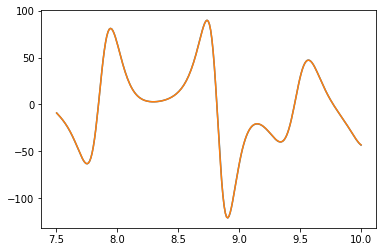

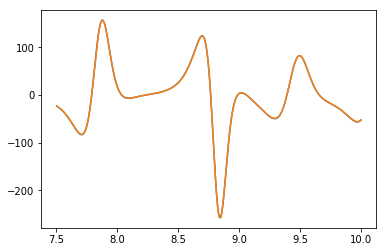

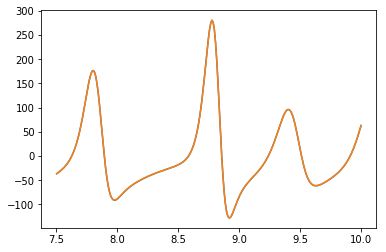

In [8]:
for i in range(x_test.shape[1]):
    plt.figure()
    plt.plot(t_test, differentiation_methods.centered_difference(x_test, t_test)[:,i])
    plt.plot(t_test, model.predict(x_test)[:,i])